## Loan Classification

### Exploratory Data Analysis

### Summary

This is **Part 1** of the project **Loan Classification: Exploratory Data Analysis**.

In this project I analyze the <a href="https://www.kaggle.com/datasets/itssuru/loan-data">Loan Data</a> provided 
by <a href="https://www.lendingclub.com/investing/peer-to-peer">Lending Club</a>.

The analysis covers **data exploration, visualization**, **data processing** and **building a classifier** to predict whether 
or not the **borrower paid back their loan in full**.

The project is done in Python. It uses Pandas and Numpy libraries for data manipulation, Seaborn and Matplotlib for 
visualizations and Sklean for building the classifier.

### Dataset Description

The **Loan Data** has **9578 observations and 14 attributes** and consists of information on the loan structure, the 
borrower, and whether the loan was paid back in full. The data was extracted between 2007 and 2010 from LendingClub.com, 
which is a company that connects borrowers with investors.


**Attribute information:**

- **credit_policy:** 1 if the customer meets the credit underwriting criteria; 0 otherwise.
- **purpose:** The purpose of the loan.
- **int_rate:** The interest rate of the loan (more risky borrowers are assigned higher interest rates).
- **installment:** The monthly installments owed by the borrower if the loan is funded.
- **log_annual_inc:** The natural log of the self-reported annual income of the borrower.
- **dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- **fico:** The FICO credit score of the borrower.
- **days_with_cr_line:** The number of days the borrower has had a credit line.
- **revol_bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- **revol_util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- **inq_last_6mths:** The borrower's number of inquiries by creditors in the last 6 months.
- **delinq_2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- **pub_rec:** The borrower's number of derogatory public records.
- **not_fully_paid:** 1 if the loan is not fully paid; 0 otherwise.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *

### Load data

In [2]:
# Retrieve data in a pandas dataframe
loan = pd.read_csv('loan_data.csv')

# Print the shape and the first rows
print(loan.shape)
print()
loan.head()

(9578, 14)



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Get columns info

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Descriptive statistics

In [4]:
loan.describe().style.format("{:.2f}")

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.80,0.12,319.09,10.93,12.61,710.85,4560.77,16913.96,46.80,1.58,0.16,0.06,0.16
std,0.40,0.03,207.07,0.61,6.88,37.97,2496.93,33756.19,29.01,2.20,0.55,0.26,0.37
min,0.00,0.06,15.67,7.55,0.00,612.00,178.96,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.10,163.77,10.56,7.21,682.00,2820.00,3187.00,22.60,0.00,0.00,0.00,0.00
50%,1.00,0.12,268.95,10.93,12.66,707.00,4139.96,8596.00,46.30,1.00,0.00,0.00,0.00
75%,1.00,0.14,432.76,11.29,17.95,737.00,5730.00,18249.50,70.90,2.00,0.00,0.00,0.00
max,1.00,0.22,940.14,14.53,29.96,827.00,17639.96,1207359.00,119.00,33.00,13.00,5.00,1.00


### Check for duplicates

In [5]:
loan.duplicated().value_counts()  

False    9578
dtype: int64

### Check for missing values

In [6]:
loan.isnull().sum()      

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

There are **no duplicates** and **no missing** values.

### Check the target class distribution

In [7]:
loan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

We observe that there is a **class imbalance** with **fewer examples** of **loans not fully paid** (class 1).

## Exploration

While exploring the data we want to answer the following **questions**: 

### 1. What columns are positively and negatively correlated with each other? 
### 2. Do the column correlations change if we segment it by the purpose of the loan?

To answer these questions we'll generate a correlation matrix between the numeric columns.

### Create a correlation matrix between the numeric columns

<AxesSubplot:>

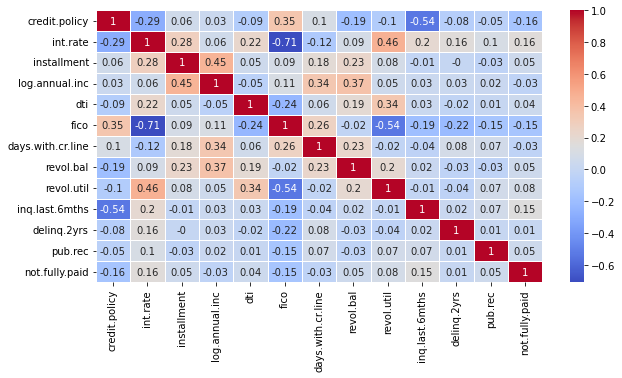

In [8]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a correlation map of the variables
corr = loan.corr().round(2)

# Plot the heatmap
sns.heatmap(corr, annot=True, 
        linewidths=.5, cmap='coolwarm') 

**Observations**: 
 
- The **revolving utilization rate** does **impact** the **interest rate**: their relationship has
the **highest positive correlation** of **0.46**.


- **FICO score** is **positivelly correlated** with **credit policy**: a **higher FICO score** helps a borrower meet 
the **high value** for **credit policy** criteria.
   
    
- The **credit limit** is **positively correlated** with **income**: **higher income** means **higher credit limit**.
 

- The **amount** to be paid **monthly** **increases** with the **annual income** of the borrower. 


- **Interest rates** are **influenced** by borrower's **credit rating** and **financial history**. The **negative 
relationships** between **interest rate** and **FICO score** and **credit policy** indicate that **more risky borrowers** are assigned **higher interest rates**.
 
    
- **Credit rating** is **negatively correlated** with borrower's **revolving balance**, the number of **inquiries by creditors** in the **last 6 months** and the number of times the borrower had been 30+ **days past due on a payment** in the past 2 years.

### Segment data by the purpose of the loan

Segmenting a correlation map by a categorical variable involves visualizing how the relationships between numerical variables
change across different categories

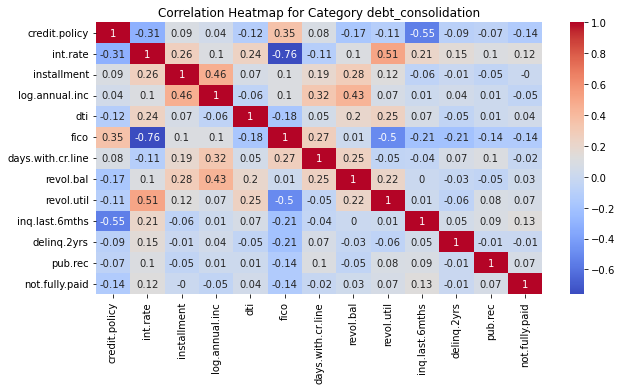

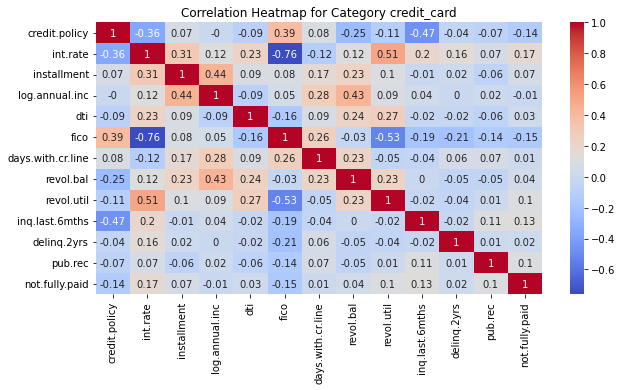

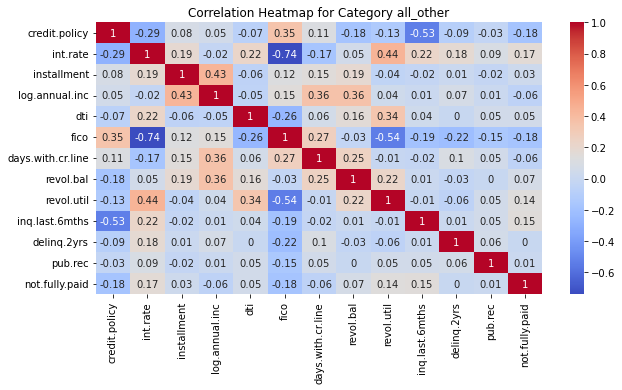

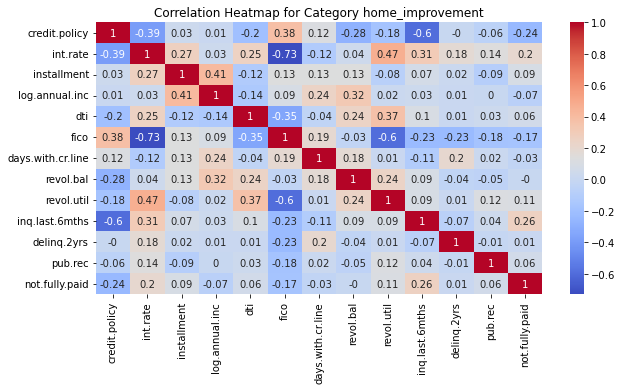

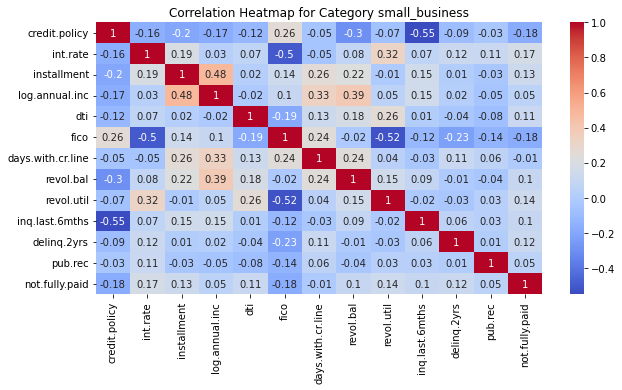

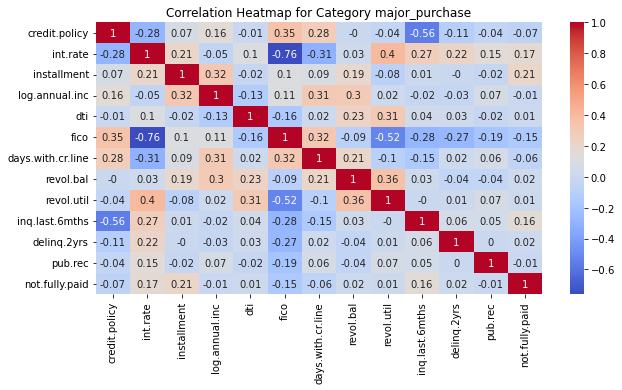

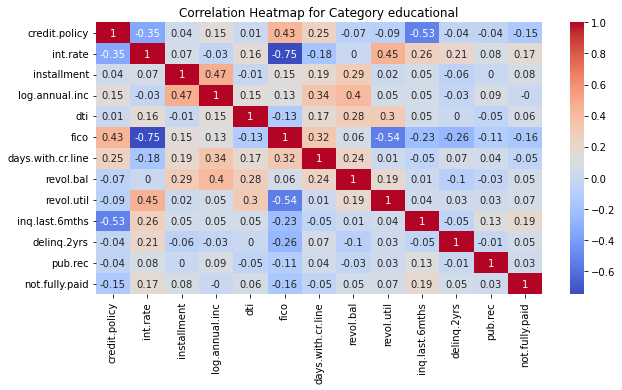

In [9]:
# Segment data by category and calculate correlations
categories = loan['purpose'].unique()

for category in categories:
    subset = loan[loan['purpose'] == category]
    corr = subset.corr().round(2)
    # Plot heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for Category {category}')
    plt.show()

There are some **changes** in **relationships** between **numerical variables** across different **categories** in loan **purpose** after 
**segmenting** the correlation map:   
    
- The **positive** correlation **increased** for some variables. For example, between the **interest rate** and **revolving utilization** for **debt consolidation** and **credit card** categories. Meantime, the **positive** 
relationship **decreased** for **small business** between **credit policy** and **FICO score**. 


- The **negative** correlation **decreased** between **interest rate** and **FICO score** for **debt consolidation**, **credit card**, **major purchase**, and **educational** categories, but it **increased** for **small business**.


- For **home improvement** category, several relationships **changed** either from **negative to positive** or **positive 
to negative**.

## Visualization

We will **plot histograms** for **numeric columns** with a **color element** to **segment** the bars by **not_fully_paid**.

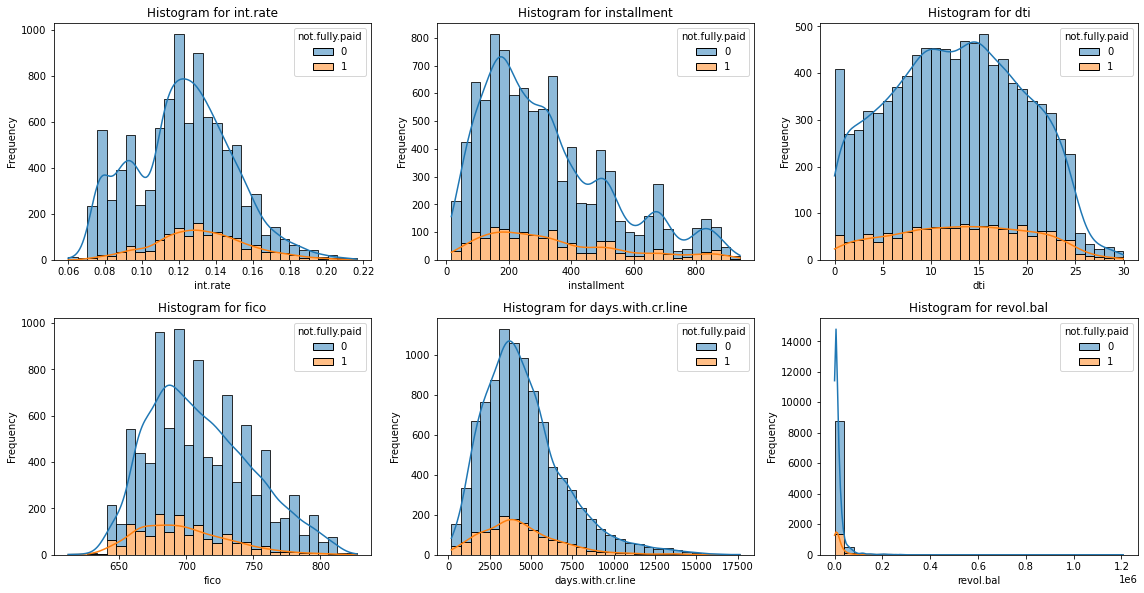

In [10]:
# List of numerical variables
num_features = ['int.rate', 'installment',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal']

# Create subplots for each numerical attribute
plt.figure(figsize=(16, 12))

for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=loan, x=feature, 
                 hue='not.fully.paid', bins=30, 
                 multiple='stack', kde=True)
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms show the **class imbalance**, with the **distributions** of the **not fully paid** loans having a much **lower 
frequency** than the **distributions** of the **paid loans**. 

**FICO score** and **credit line** have a **close to normal distribution**, slightly **skewed** to the **right**. 

**Interest rate** shows a **bimodal distribution** while **Installment** shows a **multimodal distribution**.

**Revolving balance** has a highly **skewed distribution**.

## Analysis

### 3. Do loans with the same purpose have similar qualities not shared by loans with differing purposes?

The answer the question above we need to visualize the relationship between the loan purpose and other variables for fully paid loans.

### Visualize the relationship between loan purpose and different numeric variables for fully paid loans

In [11]:
# Create a mask for loans fully paid
mask_paid = loan.loc[:, 'not.fully.paid'] == 0

# Create a dataset only for fully paid loans
paid_loans = loan.loc[mask_paid, :]

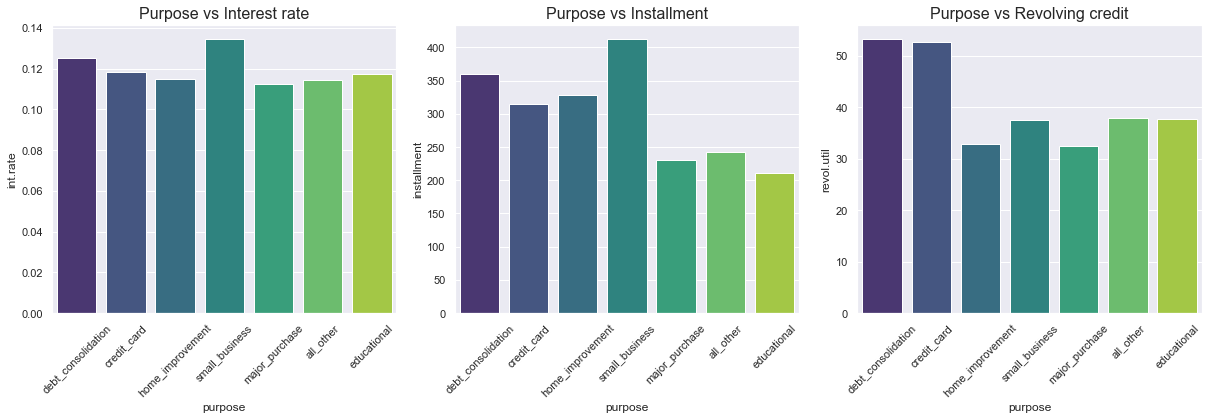

In [12]:
# Define figure size
sns.set(rc={"figure.figsize":(12, 3)})

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=paid_loans, x='purpose', 
            y='int.rate', palette='viridis', 
            ci=None) 
# Plot title
plt.title('Purpose vs Interest rate', 
          fontsize=16)
plt.xticks(rotation=45)       

plt.subplot(1, 3, 2)
sns.barplot(data=paid_loans, x='purpose', 
            y='installment', palette='viridis', 
            ci=None)   
# Plot title
plt.title('Purpose vs Installment', 
          fontsize=16)
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(data=paid_loans, x='purpose', 
            y='revol.util', palette='viridis', 
            ci=None) 
# Plot title
plt.title('Purpose vs Revolving credit', 
          fontsize=16)
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

We observe that **fully paid loans for similar purposes**, such as **home improvement** or **major purchase**, have **lower interest rates**.

Loans for **small business**, **debt consolidation** or **credit card** have **higher rates**.

Monthly **installments** are **similar** for **debt consolidation**, **credit card** and **home improvement**. 

**Debt consolidation** and **credit card** have **likewise** high **values** for **revolving credit**.

**Home improvement** loans have **comparable credit limit** with **small business** and **credit card**. 

### Conclusions

Data analysis highlighted some factors that influence lenders' decision to lend money. Those factors can help assess the risk 
involved and ensure that the borrower is likely to repay the loan. Key considerations include:
    
- **Credit score and Credit History**: Lenders rely on credit scores to assess an individual's history of managing debt and making payments on time.
A high credit score signals lower risk.
 
- **Income**: The borrower's income level and employment stability help determine their capacity to repay. 
Consistent and sufficient income reduces risk. A higher income means a higher credit limit.

- **Debt-to-Income Ratio**: A lower debt-to-income ratio indicates the borrower is managing their debts well and can afford additional loans.

- **Loan Purpose**: The intended use of the loan - whether for buying a home, starting a business, or personal expenses - can impact approval and 
the interest rate. Some purposes are deemed riskier than others.

- **Loan Amount and Terms**: The size of the loan and repayment duration are important. Large loans or longer terms may involve more risk and require 
stricter eligibility criteria.

These factors combine providing a comprehensive picture of the borrower's ability and the likelihood of repaying the loan.